In [612]:
from modsim import *
%matplotlib inline
import matplotlib.pyplot as plt



http://www4.ncsu.edu/~franzen/public_html/CH437/lec1/pdf/earth_T.pdf

http://www.pveducation.org/pvcdrom/2-properties-sunlight/solar-radiation-space

In [613]:
degrees= UNITS.degrees

In [744]:
mkm= 1/1000

sechour= (1/60)**2 

mass_sun= 1.989e30 
G= 6.673e-11 * mkm**3 
mass_toast= .5
S_B_const= 5.67e-8 *mkm
temp_S= 5772 
area_t= .01 *mkm**2
r_s= 3.19e3
Pow_s= 3.9e26 
C_bread= 27
SA_sun= 4*pi*r_s**2
flux_sun= 6.33e7



num_G = G* mass_sun   

num_G

dist_init= 5e8

VXinit= sqrt(2*num_G/dist_init)

SA_sun


#I think these are all the equations and constants we need. I found a specific heat for bread that was in kg and C, 
#which I think I converted into Kelvin but it's a bit sketchy. I'm also not sure about the area of the sunward facing 
#toast side, but we can look back at that. 

127876644.00878038

In [754]:

condition= Condition(x0= 0, y0= -5e8, velocity= 8, angle = 45*degrees, duration= 1e8, T0= 0 )

In [755]:
#I'm not sure I'm doing this right, I'm mostly copying this from chapter 10 with the intro to vectors and the baseball. 

def make_system(condition):
    unpack(condition)
    
    theta = np.deg2rad(angle)
    
    vx, vy = pol2cart(theta, velocity) 
    w0= vx

    
    ts= linspace(0, duration, 101)
    time_step= duration/ 101 
    
   
    
    P_abs=  area_t*(Pow_s / (4*pi*y0**2)) 
    temp_toast= P_abs / C_bread /mass_toast
    
    init= State(x=x0, y=y0, vx= vx, vy= vy, temp= temp_toast)
    area_toast = area_t 
    
    return System(init= init, mass= mass_toast, area_t= area_t, ts= ts)

system= make_system(condition) 



In [756]:
def slope_func(state, t, system):
    x, y, vx, vy, temp= state
    
    unpack(system)
    dist= sqrt(x**2+y**2)
    P= Vector(-x, -y) 
    V= Vector(vx, vy) 
    tan_vect= Vector((-y/dist), (x/ dist))
    tan_v= tan_vect/tan_vect.mag
    #print(tan_v)
    
    xdir= -x/ dist
    ydir= -y/dist
    w= V.proj(tan_v)
    

    F_grav= G* mass_sun *mass_toast/ (dist)**2
    
    a_grav= Vector(xdir, ydir) *((F_grav)/mass_toast) 
    a_cent= Vector(-xdir, -ydir) *(w.mag**2)/dist
    
    #print(a_cent)
    ax= a_grav.x + a_cent.x
    ay= a_grav.y + a_cent.y
    
    
    P_abs=  area_t* (Pow_s/(4*pi*dist**2)) 
    temp_toast= P_abs /C_bread/ mass_toast -temp
    
    
    
    return vx, vy, ax, ay, temp_toast
    
    
                     
    
    
slope_func(system.init,1,system)
    

(<Quantity(5.656854249492381, 'dimensionless')>,
 <Quantity(5.656854249492381, 'dimensionless')>,
 <Quantity(0.0, 'dimensionless')>,
 <Quantity(4.669038799999999e-07, 'dimensionless')>,
 0.0)

In [757]:

run_odeint(system, slope_func)

In [758]:
system.results

,x,y,vx,vy,temp
0.0,0.000000e+00,-5.000000e+08,5.656854,5.656854,0.091956
1000000.0,5.655959e+06,-4.941080e+08,5.654154,6.128841,0.094150
2000000.0,1.130642e+07,-4.877387e+08,5.645795,6.611671,0.096586
3000000.0,1.694552e+07,-4.808807e+08,5.631344,7.106439,0.099290
4000000.0,2.256691e+07,-4.735214e+08,5.610294,7.614353,0.102295
5000000.0,2.816371e+07,-4.656472e+08,5.582050,8.136751,0.105638
6000000.0,3.372838e+07,-4.572426e+08,5.545916,8.675129,0.109363
7000000.0,3.925264e+07,-4.482910e+08,5.501069,9.231160,0.113523
8000000.0,4.472729e+07,-4.387738e+08,5.446539,9.806732,0.118182
9000000.0,5.014211e+07,-4.286703e+08,5.381173,10.403983,0.123416


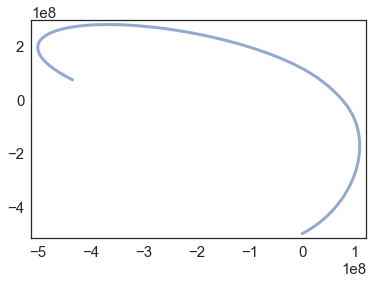

In [759]:
plot(system.results.x, system.results.y, )
#plt.axis([-5e8, 5e8, -5e8, 1.2e10])

77000000.0


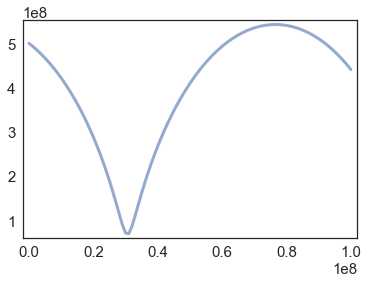

In [760]:
magdist= sqrt(system.results.y**2 + system.results.x**2)

plot(system.ts, magdist)

mindist= magdist.argmax()
print(mindist)

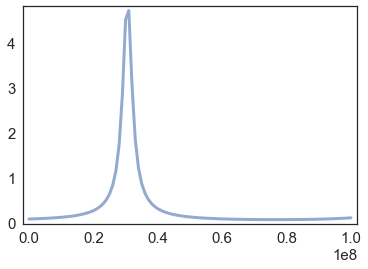

In [761]:
plot(system.ts, system.results.temp)

In [762]:
min_dist= magdist.argmin()

temp= system.results.temp
max_temp= temp.max()
print(mindist, max_temp)



77000000.0 4.71437708524
